In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NktQinIO2EzMPfvug52h")
project = rf.workspace("sindhu").project("car_dent_scratch_detection-1")
dataset = project.version(9).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=61939036d51f467ea116785ed4e39d8280ccdb40f59fcc6f6727f74b63b81db5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Car_Dent_Scratch_Detection(1)-9 in yolov5pytorch:: 100%|██████████| 6154/6154 [00:01<00:00, 3334.30it/s]


In [ ]:
!python train.py --img 640 --batch 32 --epochs 150 --data /content/Car_Dent_Scratch_Detection(1)-9/data.yaml --weights "/content/best.pt"


/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `python train.py --img 640 --batch 32 --epochs 150 --data /content/Car_Dent_Scratch_Detection(1)-9/data.yaml --weights "/content/best.pt"'


# **Loading custom trained model and displaying the detections**


You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-29 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


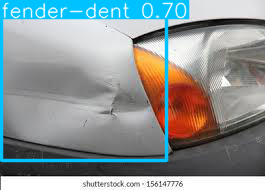

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/best.pt', force_reload = True)
im = '/content/Car_Dent_Scratch_Detection(1)-9/test/images/Minor_bumper-sep27---92----Copy_jpg.rf.8a10e5f8ec99252aaa7683c4514469b9.jpg'
results = model(im)  # inference
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.
